In [2]:
%matplotlib nbagg
import jungfrau_utils as ju
import numpy as np
import json
import os
import time
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

import h5py

from alvra_tools import *
from alvra_tools.channels import *
#from alvra_tools.channels_raw import *

In [3]:
#scan_name ="Ru_foil_monoscan_001"
#scan_name =""

#DIR = "/das/work/p17/p17983/cropped_data/"
DIR = "/das/work/p17/p17983/cropped_data/scan_data/RuBpy3_monoscan_006/"
DIR_json = "/sf/alvra/data/p17983/res/scan_info/"

!ls -lah -t $DIR

!hostname

listfile = os.listdir(DIR)
number_files = len(listfile)
print ("There are",number_files,"files in the folder", DIR)

total 76G
drwxrws---+ 53 cirelli_c p17983  32K Jul 25 06:57 ..
drwxrws---+  2 cirelli_c p17983  32K Jul 25 00:54 .
-rw-rw----+  1 cirelli_c p17983 2.1G Jul 25 00:54 RuBpy3_monoscan_006_step0035.JF02T09V02crop.h5
-rw-rw----+  1 cirelli_c p17983 2.1G Jul 25 00:53 RuBpy3_monoscan_006_step0034.JF02T09V02crop.h5
-rw-rw----+  1 cirelli_c p17983 2.1G Jul 25 00:52 RuBpy3_monoscan_006_step0033.JF02T09V02crop.h5
-rw-rw----+  1 cirelli_c p17983 2.1G Jul 25 00:52 RuBpy3_monoscan_006_step0032.JF02T09V02crop.h5
-rw-rw----+  1 cirelli_c p17983 2.1G Jul 25 00:51 RuBpy3_monoscan_006_step0031.JF02T09V02crop.h5
-rw-rw----+  1 cirelli_c p17983 2.1G Jul 25 00:51 RuBpy3_monoscan_006_step0030.JF02T09V02crop.h5
-rw-rw----+  1 cirelli_c p17983 2.1G Jul 25 00:50 RuBpy3_monoscan_006_step0029.JF02T09V02crop.h5
-rw-rw----+  1 cirelli_c p17983 2.1G Jul 25 00:49 RuBpy3_monoscan_006_step0028.JF02T09V02crop.h5
-rw-rw----+  1 cirelli_c p17983 2.1G Jul 25 00:49 RuBpy3_monoscan_006_step0027.JF02T09V02crop.h5
-rw-rw----+ 

In [4]:
fn_crop = "RuBpy3_monoscan_006_step0035.JF02T09V02crop.h5"
jf_file_crop = h5py.File(DIR + fn_crop, "r")
print (jf_file_crop)
print(list(jf_file_crop.keys()))

imagesROI2 = jf_file_crop["images_roi2"]
pulse_IDs = jf_file_crop["pulse_ids"]

h5py.File.close

<HDF5 file "RuBpy3_monoscan_006_step0035.JF02T09V02crop.h5" (mode r)>
['coords_roi1', 'coords_roi2', 'coords_roi3', 'coords_roi4', 'images_roi1', 'images_roi2', 'images_roi3', 'images_roi4', 'pulse_ids']


<function h5py._hl.files.File.close(self)>

<IPython.core.display.Javascript object>


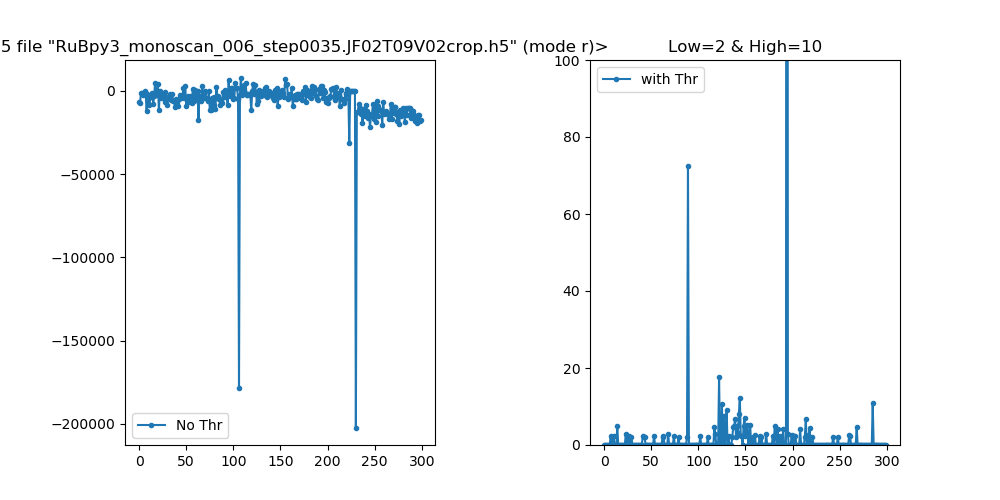

(0, 100)

In [5]:
nframes =len(pulse_IDs)
#nframes = 100

total_roi = 0
total_roi_thr = 0
threshold_low = 2
threshold_high = 10

for i in range(nframes):
    image_roi = imagesROI2[i][:]
    image_roi_thr = image_roi
    total_roi += image_roi
    image_roi_thr[image_roi < threshold_low] = 0
    image_roi_thr[image_roi > threshold_high] = 0
    #image_roi_thr = convert_to_photon_num_range(image_roi_thr)
    total_roi_thr += image_roi_thr
    
total_ave = total_roi.sum(axis = 0)
total_avethr = total_roi_thr.sum(axis = 0)
    
plt.figure(figsize = (10,5))
plt.subplots_adjust(wspace=0.5)

plt.subplot(121)
plt.plot(total_ave, label="No Thr", marker='.')
plt.legend(loc="best")
plt.title(jf_file_crop)

plt.subplot(122)
plt.plot(total_avethr, label="with Thr", marker='.')
plt.legend(loc="best")
plt.title("Low=" + str(threshold_low) +" & High="+ str(threshold_high))
plt.ylim((0,100))

# New script in the next cell (single file)

In [89]:
#from glob import glob
#files = sorted(glob(DIR + "*"))

files = ["RuBpy3_monoscan_006_step0035"]
#files = ["RuBpy3_monoscan_006_step00{}".format(i) for i in range(15, 36)]
#files = ["run_000{}".format(i) for i in list(range(386, 400))+list(range(405, 410))]

threshold_low = 2
threshold_high = 10

######################################################################################
clock = Clock()
spectrum_ON_roi1 = 0
spectrum_OFF_roi1 = 0
spectrum_ON_roi2 = 0
spectrum_OFF_roi2 = 0
spectrum_ON_roi3 = 0
spectrum_OFF_roi3 = 0
spectrum_ON_roi3 = 0
spectrum_OFF_roi3 = 0
energy_eV = 0
j = 0
        
for f in files:
    j +=1
    JF_single_file_crop = DIR + f + ".JF02T09V02crop.h5"
    BS_single_file = DIR + f + ".BSREAD.h5"
    #print("Processing file %s" % (JF_single_file_crop))
    
    print("\nFile", j, "of", len(files), ": Processing:", JF_single_file_crop.split("/")[-1])
    
    nshots = None  # put this to None for ALL images
#   nshots = None
    
    imgs1, pids = load_JF_cropped_data(JF_single_file_crop, 1, nshots=None)
    imgs2, pids = load_JF_cropped_data(JF_single_file_crop, 2, nshots=None)
    imgs3, pids = load_JF_cropped_data(JF_single_file_crop, 3, nshots=None)
    imgs4, pids = load_JF_cropped_data(JF_single_file_crop, 4, nshots=None)
    

    reprate_on, reprate_off = make_reprates_on_off(pids, 50, 25)
    imgs1_ON  = imgs1[reprate_on]
    imgs1_OFF = imgs1[reprate_off]
    imgs2_ON  = imgs2[reprate_on]
    imgs2_OFF = imgs2[reprate_off]
    imgs3_ON  = imgs3[reprate_on]
    imgs3_OFF = imgs3[reprate_off]
    imgs4_ON  = imgs4[reprate_on]
    imgs4_OFF = imgs4[reprate_off]
    
    imgs1_ON_thr = imgs1_ON.copy()
    imgs1_ON_thr[imgs1_ON < threshold_low] = 0
    imgs1_ON_thr[imgs1_ON > threshold_high] = 0
    imgs1_OFF_thr = imgs1_OFF.copy()
    imgs1_OFF_thr[imgs1_OFF < threshold_low] = 0
    imgs1_OFF_thr[imgs1_OFF > threshold_high] = 0
    
    imgs2_ON_thr = imgs2_ON.copy()
    imgs2_ON_thr[imgs2_ON < threshold_low] = 0
    imgs2_ON_thr[imgs2_ON > threshold_high] = 0
    imgs2_OFF_thr = imgs2_OFF.copy()
    imgs2_OFF_thr[imgs2_OFF < threshold_low] = 0
    imgs2_OFF_thr[imgs2_OFF > threshold_high] = 0
    
    imgs3_ON_thr = imgs3_ON.copy()
    imgs3_ON_thr[imgs3_ON < threshold_low] = 0
    imgs3_ON_thr[imgs3_ON > threshold_high] = 0
    imgs3_OFF_thr = imgs3_OFF.copy()
    imgs3_OFF_thr[imgs3_OFF < threshold_low] = 0
    imgs3_OFF_thr[imgs3_OFF > threshold_high] = 0
    
    imgs4_ON_thr = imgs4_ON.copy()
    imgs4_ON_thr[imgs4_ON < threshold_low] = 0
    imgs4_ON_thr[imgs4_ON > threshold_high] = 0
    imgs4_OFF_thr = imgs4_OFF.copy()
    imgs4_OFF_thr[imgs4_OFF < threshold_low] = 0
    imgs4_OFF_thr[imgs4_OFF > threshold_high] = 0

    spectrum_ON_roi1  += imgs1_ON_thr.sum(axis = 1).sum(axis = 0)
    spectrum_OFF_roi1 += imgs1_OFF_thr.sum(axis = 1).sum(axis = 0)
    spectrum_ON_roi2  += imgs2_ON_thr.sum(axis = 1).sum(axis = 0)
    spectrum_OFF_roi2 += imgs2_OFF_thr.sum(axis = 1).sum(axis = 0)
    spectrum_ON_roi3  += imgs3_ON_thr.sum(axis = 1).sum(axis = 0)
    spectrum_OFF_roi3 += imgs3_OFF_thr.sum(axis = 1).sum(axis = 0)
    spectrum_ON_roi4  += imgs4_ON_thr.sum(axis = 1).sum(axis = 0)
    spectrum_OFF_roi4 += imgs4_OFF_thr.sum(axis = 1).sum(axis = 0)
    
    print ("It took", clock.tick(), "seconds to process this file")
    
print ("\nJob done! It took", clock.tock(), "seconds to process", len(files), "file(s)")



File 1 of 1 : Processing: RuBpy3_monoscan_006_step0035.JF02T09V02crop.h5
images_roi1: [4300 4600    0  512]
images_roi2: [4950 5250    0  512]
images_roi3: [8500 8700    0  512]
images_roi4: [6950 7250    0  512]
It took 4.45 seconds to process this file

Job done! It took 4.46 seconds to process 1 file(s)


<IPython.core.display.Javascript object>


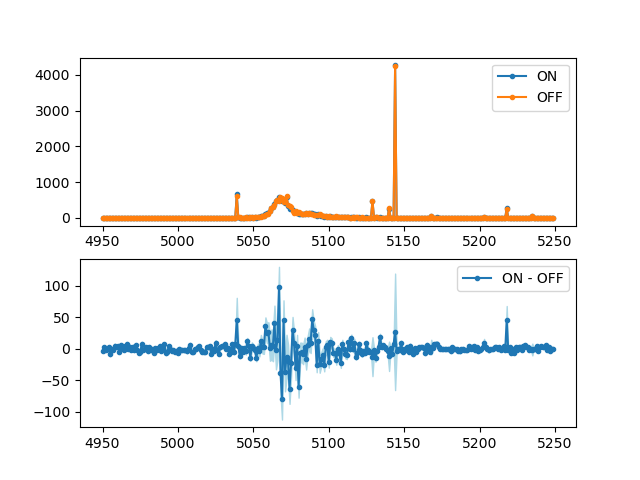

In [80]:
roi2 = [4950, 5250]
spectra_on = spectrum_ON_roi2.copy()
spectra_off = spectrum_OFF_roi2.copy()
x_axis = np.arange(roi2[0], roi2[1])

######################################################################################

bin_ = 1   # change the bin size if wanted, 1 is every pixel

spectra_on_rebin2  = bin_sum(spectra_on,  bin_)
spectra_off_rebin2 = bin_sum(spectra_off, bin_)
x_axis_rebin2 = bin_mean(x_axis, bin_)

spectra_on_err2  = np.sqrt(spectra_on_rebin2)
spectra_off_err2 = np.sqrt(spectra_off_rebin2)

#spectrumAllOutFoc=spectra_on_rebin1 + spectra_off_rebin1
plt.figure()
plt.subplot(211)
plt.plot(x_axis_rebin2, spectra_on_rebin2, label="ON", marker='.')
plt.plot(x_axis_rebin2, spectra_off_rebin2, label="OFF", marker='.')
plt.legend(loc="best")
#plt.title(jf_file)

low_err= (spectra_on_rebin2 - spectra_off_rebin2)-np.sqrt(spectra_on_err2**2+spectra_off_err2**2)
high_err= (spectra_on_rebin2 - spectra_off_rebin2)+np.sqrt(spectra_on_err2**2+spectra_off_err2**2)
#x_axis_rebin1,
plt.subplot(212)
plt.plot(x_axis_rebin2,spectra_on_rebin2 - spectra_off_rebin2, label="ON - OFF",marker='.')
#plt.plot(spectra_on_rebin1 - spectra_off_rebin1, label="ON - OFF",marker='.')

plt.legend(loc="best")
plt.fill_between(x_axis_rebin2, low_err, high_err, color='lightblue')
plt.show()

# New script in the next cell (scans) 

In [26]:
scan_data = list(reversed(sorted(glob(DIR + "*"))))
scan_data

['/das/work/p17/p17983/cropped_data/scan_data/RuBpy3_monoscan_006/RuBpy3_monoscan_006_step0035.JF02T09V02crop.h5',
 '/das/work/p17/p17983/cropped_data/scan_data/RuBpy3_monoscan_006/RuBpy3_monoscan_006_step0034.JF02T09V02crop.h5',
 '/das/work/p17/p17983/cropped_data/scan_data/RuBpy3_monoscan_006/RuBpy3_monoscan_006_step0033.JF02T09V02crop.h5',
 '/das/work/p17/p17983/cropped_data/scan_data/RuBpy3_monoscan_006/RuBpy3_monoscan_006_step0032.JF02T09V02crop.h5',
 '/das/work/p17/p17983/cropped_data/scan_data/RuBpy3_monoscan_006/RuBpy3_monoscan_006_step0031.JF02T09V02crop.h5',
 '/das/work/p17/p17983/cropped_data/scan_data/RuBpy3_monoscan_006/RuBpy3_monoscan_006_step0030.JF02T09V02crop.h5',
 '/das/work/p17/p17983/cropped_data/scan_data/RuBpy3_monoscan_006/RuBpy3_monoscan_006_step0029.JF02T09V02crop.h5',
 '/das/work/p17/p17983/cropped_data/scan_data/RuBpy3_monoscan_006/RuBpy3_monoscan_006_step0028.JF02T09V02crop.h5',
 '/das/work/p17/p17983/cropped_data/scan_data/RuBpy3_monoscan_006/RuBpy3_monosca

In [54]:
scan_name = "RuBpy3_monoscan_006"          # you need to change only this name

threshold_low = 2
threshold_high = 10

######################################################################################
from glob import glob
scan_data = list(reversed(sorted(glob(DIR + "*"))))

fname_scan = DIR_json + scan_name + "_scan_info.json"
scan_data_json = load_scan_data(fname_scan)

Energy_eV = []
Delay_mm = []
XAS_roi1 = []
Error_XAS_roi1 = []
XAS_roi2 = []
Error_XAS_roi2 = []
XAS_roi3 = []
Error_XAS_roi3 = []
XAS_roi4 = []
Error_XAS_roi4 = []

RIXS_transient_roi1 = []
RIXS_transient_roi2 = []
RIXS_transient_roi3 = []
RIXS_transient_roi4 = []
Error_transient_roi1 = []
Error_transient_roi2 = []
Error_transient_roi3 = []
Error_transient_roi4 = []
RIXS_unpumped_roi1 = []
RIXS_unpumped_roi2 = []
RIXS_unpumped_roi3 = []
RIXS_unpumped_roi4 = []
Error_unpumped_roi1 = []
Error_unpumped_roi2 = []
Error_unpumped_roi3 = []
Error_unpumped_roi4 = []
RIXS_pumped_roi1 = []
RIXS_pumped_roi2 = []
RIXS_pumped_roi3 = []
RIXS_pumped_roi4 = []
Error_pumped_roi1 = []
Error_pumped_roi2 = []
Error_pumped_roi3 = []
Error_pumped_roi4 = []

clock = Clock()
num_scan_files = len(scan_data)
print("\nProcessing", num_scan_files, "files total")

for i, fn in enumerate(scan_data):
#    fn2 = fn.split(".JF06T32V01.h5")[0] + ".JF02T09V02.h5"
#    fn2 = fn.replace(".JF06T32V01.h5", ".JF02T09V02.h5")
    print("\nFile", i+1, "of", num_scan_files, ": Processing:", scan_data_json[num_scan_files-1-i][0].split("/")[-1])
    print("File", i+1, "of", num_scan_files, ": Processing:", fn.split("/")[-1])
    
    energy, pids = load_single_channel_pulseID(scan_data_json[num_scan_files-1-i][0], channel_energy, 50)
    energy = [x for x in energy if (x > 0)]
    Energy_eV.append(np.mean(energy))
    
    spectrum_ON_roi1 = 0
    spectrum_OFF_roi1 = 0
    spectrum_ON_roi2 = 0
    spectrum_OFF_roi2 = 0
    spectrum_ON_roi3 = 0
    spectrum_OFF_roi3 = 0
    spectrum_ON_roi4 = 0
    spectrum_OFF_roi4 = 0
    
    #nshots = 10  # put this to None for ALL images
    nshots = None
    
    imgs1, pids = load_JF_cropped_data(fn, 1, nshots=None)
    imgs2, pids = load_JF_cropped_data(fn, 2, nshots=None)
    imgs3, pids = load_JF_cropped_data(fn, 3, nshots=None)
    imgs4, pids = load_JF_cropped_data(fn, 4, nshots=None)
    
    reprate_on, reprate_off = make_reprates_on_off(pids, 50, 25)
    imgs1_ON  = imgs1[reprate_on]
    imgs1_OFF = imgs1[reprate_off]
    imgs2_ON  = imgs2[reprate_on]
    imgs2_OFF = imgs2[reprate_off]
    imgs3_ON  = imgs3[reprate_on]
    imgs3_OFF = imgs3[reprate_off]
    imgs4_ON  = imgs4[reprate_on]
    imgs4_OFF = imgs4[reprate_off]
    
    imgs1_ON_thr = imgs1_ON.copy()
    imgs1_ON_thr[imgs1_ON < threshold_low] = 0
    imgs1_ON_thr[imgs1_ON > threshold_high] = 0
    imgs1_OFF_thr = imgs1_OFF.copy()
    imgs1_OFF_thr[imgs1_OFF < threshold_low] = 0
    imgs1_OFF_thr[imgs1_OFF > threshold_high] = 0
    
    imgs2_ON_thr = imgs2_ON.copy()
    imgs2_ON_thr[imgs2_ON < threshold_low] = 0
    imgs2_ON_thr[imgs2_ON > threshold_high] = 0
    imgs2_OFF_thr = imgs2_OFF.copy()
    imgs2_OFF_thr[imgs2_OFF < threshold_low] = 0
    imgs2_OFF_thr[imgs2_OFF > threshold_high] = 0
    
    imgs3_ON_thr = imgs3_ON.copy()
    imgs3_ON_thr[imgs3_ON < threshold_low] = 0
    imgs3_ON_thr[imgs3_ON > threshold_high] = 0
    imgs3_OFF_thr = imgs3_OFF.copy()
    imgs3_OFF_thr[imgs3_OFF < threshold_low] = 0
    imgs3_OFF_thr[imgs3_OFF > threshold_high] = 0
    
    imgs4_ON_thr = imgs4_ON.copy()
    imgs4_ON_thr[imgs4_ON < threshold_low] = 0
    imgs4_ON_thr[imgs4_ON > threshold_high] = 0
    imgs4_OFF_thr = imgs4_OFF.copy()
    imgs4_OFF_thr[imgs4_OFF < threshold_low] = 0
    imgs4_OFF_thr[imgs4_OFF > threshold_high] = 0
    
    spectrum_ON_roi1  = imgs1_ON_thr.sum(axis = 1).sum(axis = 0)
    spectrum_OFF_roi1 = imgs1_OFF_thr.sum(axis = 1).sum(axis = 0)
    spectrum_ON_roi2  = imgs2_ON_thr.sum(axis = 1).sum(axis = 0)
    spectrum_OFF_roi2 = imgs2_OFF_thr.sum(axis = 1).sum(axis = 0)
    spectrum_ON_roi3  = imgs3_ON_thr.sum(axis = 1).sum(axis = 0)
    spectrum_OFF_roi3 = imgs3_OFF_thr.sum(axis = 1).sum(axis = 0)
    spectrum_ON_roi4  = imgs4_ON_thr.sum(axis = 1).sum(axis = 0)
    spectrum_OFF_roi4 = imgs4_OFF_thr.sum(axis = 1).sum(axis = 0)
    
    XAS_roi1.append(np.abs(spectrum_OFF_roi1.sum()))
    RIXS_unpumped_roi1.append(spectrum_OFF_roi1)
    Error_unpumped_roi1.append(np.sqrt(spectrum_OFF_roi1))
    RIXS_pumped_roi1.append(spectrum_ON_roi1)
    Error_pumped_roi1.append(np.sqrt(spectrum_ON_roi1))
    RIXS_transient_roi1.append(spectrum_ON_roi1 - spectrum_OFF_roi1)
    Error_transient_roi1.append(np.sqrt((np.sqrt(spectrum_ON_roi1))**2 + (np.sqrt(spectrum_OFF_roi1))**2))
    
    XAS_roi2.append(np.abs(spectrum_OFF_roi2.sum()))
    RIXS_unpumped_roi2.append(spectrum_OFF_roi2)
    Error_unpumped_roi2.append(np.sqrt(spectrum_OFF_roi2))
    RIXS_pumped_roi2.append(spectrum_ON_roi2)
    Error_pumped_roi2.append(np.sqrt(spectrum_ON_roi2))
    RIXS_transient_roi2.append(spectrum_ON_roi2 - spectrum_OFF_roi2)
    Error_transient_roi2.append(np.sqrt((np.sqrt(spectrum_ON_roi2))**2 + (np.sqrt(spectrum_OFF_roi2))**2))
    
    XAS_roi3.append(np.abs(spectrum_OFF_roi3.sum()))
    RIXS_unpumped_roi3.append(spectrum_OFF_roi3)
    Error_unpumped_roi3.append(np.sqrt(spectrum_OFF_roi3))
    RIXS_pumped_roi3.append(spectrum_ON_roi3)
    Error_pumped_roi3.append(np.sqrt(spectrum_ON_roi3))
    RIXS_transient_roi3.append(spectrum_ON_roi3 - spectrum_OFF_roi3)
    Error_transient_roi3.append(np.sqrt((np.sqrt(spectrum_ON_roi3))**2 + (np.sqrt(spectrum_OFF_roi3))**2))
    
    XAS_roi4.append(np.abs(spectrum_OFF_roi4.sum()))
    RIXS_unpumped_roi4.append(spectrum_OFF_roi4)
    Error_unpumped_roi4.append(np.sqrt(spectrum_OFF_roi4))
    RIXS_pumped_roi4.append(spectrum_ON_roi4)
    Error_pumped_roi4.append(np.sqrt(spectrum_ON_roi4))
    RIXS_transient_roi4.append(spectrum_ON_roi4 - spectrum_OFF_roi4)
    Error_transient_roi4.append(np.sqrt((np.sqrt(spectrum_ON_roi4))**2 + (np.sqrt(spectrum_OFF_roi4))**2))
    
    
    print ("It took", clock.tick(), "seconds to process this file")

Energy_eV = np.array(Energy_eV)
XAS_roi1 = np.array(XAS_roi1)
RIXS_unpumped_roi1 = np.array(RIXS_unpumped_roi1)
Error_unpumped_roi1 = np.array(Error_unpumped_roi1)
RIXS_pumped_roi1 = np.array(RIXS_pumped_roi1)
Error_pumped_roi1 = np.array(Error_pumped_roi1)
RIXS_transient_roi1 = np.array(RIXS_transient_roi1)
Error_transient_roi1 = np.array(Error_transient_roi1)

XAS_roi2 = np.array(XAS_roi2)
RIXS_unpumped_roi2 = np.array(RIXS_unpumped_roi2)
Error_unpumped_roi2 = np.array(Error_unpumped_roi2)
RIXS_pumped_roi2 = np.array(RIXS_pumped_roi2)
Error_pumped_roi2 = np.array(Error_pumped_roi2)
RIXS_transient_roi2 = np.array(RIXS_transient_roi2)
Error_transient_roi2 = np.array(Error_transient_roi2)

XAS_roi3 = np.array(XAS_roi3)
RIXS_unpumped_roi3 = np.array(RIXS_unpumped_roi3)
Error_unpumped_roi3 = np.array(Error_unpumped_roi3)
RIXS_pumped_roi3 = np.array(RIXS_pumped_roi3)
Error_pumped_roi3 = np.array(Error_pumped_roi3)
RIXS_transient_roi3 = np.array(RIXS_transient_roi3)
Error_transient_roi3 = np.array(Error_transient_roi3)

XAS_roi4 = np.array(XAS_roi3)
RIXS_unpumped_roi4 = np.array(RIXS_unpumped_roi4)
Error_unpumped_roi4= np.array(Error_unpumped_roi4)
RIXS_pumped_roi4 = np.array(RIXS_pumped_roi4)
Error_pumped_roi4 = np.array(Error_pumped_roi4)
RIXS_transient_roi4 = np.array(RIXS_transient_roi4)
Error_transient_roi4 = np.array(Error_transient_roi4)

print ("\nJob done! It took", clock.tock(), "seconds to process", num_scan_files, "file(s)")



Processing 36 files total

File 1 of 36 : Processing: RuBpy3_monoscan_006_step0035.BSREAD.h5
File 1 of 36 : Processing: RuBpy3_monoscan_006_step0035.JF02T09V02crop.h5
images_roi1: [4300 4600    0  512]
images_roi2: [4950 5250    0  512]
images_roi3: [8500 8700    0  512]
images_roi4: [6950 7250    0  512]
It took 8.51 seconds to process this file

File 2 of 36 : Processing: RuBpy3_monoscan_006_step0034.BSREAD.h5
File 2 of 36 : Processing: RuBpy3_monoscan_006_step0034.JF02T09V02crop.h5
images_roi1: [4300 4600    0  512]
images_roi2: [4950 5250    0  512]
images_roi3: [8500 8700    0  512]
images_roi4: [6950 7250    0  512]
It took 8.89 seconds to process this file

File 3 of 36 : Processing: RuBpy3_monoscan_006_step0033.BSREAD.h5
File 3 of 36 : Processing: RuBpy3_monoscan_006_step0033.JF02T09V02crop.h5
images_roi1: [4300 4600    0  512]
images_roi2: [4950 5250    0  512]
images_roi3: [8500 8700    0  512]
images_roi4: [6950 7250    0  512]
It took 9.01 seconds to process this file

Fil

images_roi2: [4950 5250    0  512]
images_roi3: [8500 8700    0  512]
images_roi4: [6950 7250    0  512]
It took 8.55 seconds to process this file

File 27 of 36 : Processing: RuBpy3_monoscan_006_step0009.BSREAD.h5
File 27 of 36 : Processing: RuBpy3_monoscan_006_step0009.JF02T09V02crop.h5
images_roi1: [4300 4600    0  512]
images_roi2: [4950 5250    0  512]
images_roi3: [8500 8700    0  512]
images_roi4: [6950 7250    0  512]
It took 8.86 seconds to process this file

File 28 of 36 : Processing: RuBpy3_monoscan_006_step0008.BSREAD.h5
File 28 of 36 : Processing: RuBpy3_monoscan_006_step0008.JF02T09V02crop.h5
images_roi1: [4300 4600    0  512]
images_roi2: [4950 5250    0  512]
images_roi3: [8500 8700    0  512]
images_roi4: [6950 7250    0  512]
It took 8.72 seconds to process this file

File 29 of 36 : Processing: RuBpy3_monoscan_006_step0007.BSREAD.h5
File 29 of 36 : Processing: RuBpy3_monoscan_006_step0007.JF02T09V02crop.h5
images_roi1: [4300 4600    0  512]
images_roi2: [4950 5250  

<IPython.core.display.Javascript object>


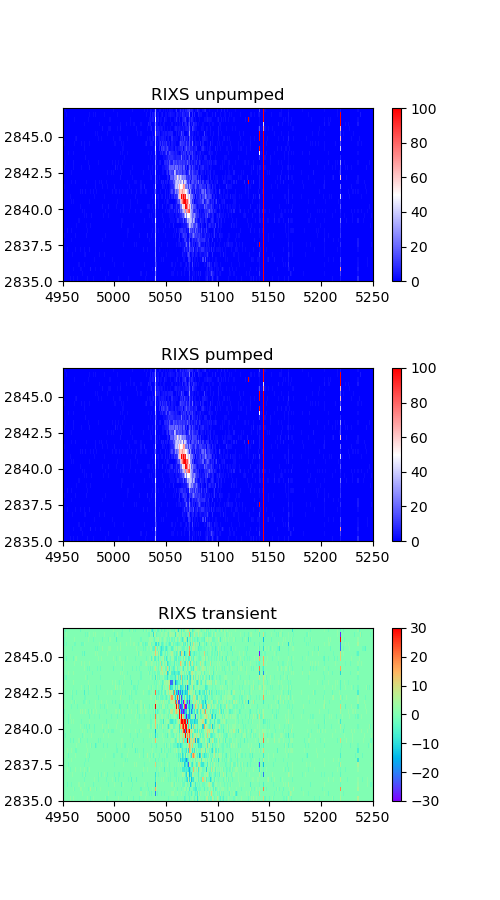

In [56]:
roi1 = [4300, 4600]
roi2 = [4950, 5250]
roi3 = [8500, 8700]
roi4 = [6950, 7250]

plt.figure(figsize=(5,9))
plt.subplots_adjust(hspace=0.5)

plt.subplot(311)
plt.imshow(RIXS_pumped_roi2, aspect = 'auto', cmap = "bwr", origin ="lower", extent=[roi2[0], roi2[1], Energy_eV[0], Energy_eV[-1]], vmin=0, vmax=100)
plt.title("RIXS unpumped")
plt.colorbar()
plt.show()

plt.subplot(312)
plt.imshow(RIXS_pumped_roi2, aspect = 'auto', cmap = "bwr", origin ="lower", extent=[roi2[0], roi2[1], Energy_eV[0], Energy_eV[-1]], vmin=0, vmax=100)
plt.title("RIXS pumped")
plt.colorbar()
plt.show()

plt.subplot(313)
plt.imshow(RIXS_transient_roi2, aspect = 'auto', cmap = "rainbow", origin ="lower", extent=[roi2[0], roi2[1], Energy_eV[0], Energy_eV[-1]], vmin=-30, vmax=30)
plt.title("RIXS transient")
plt.colorbar()
plt.show()

# Next cells: old code (still works...)

# Set the ROIs (roi1 & roi2 in pixels) in the next cell

# The next cell is to analyse a single file or a series of identical ones to be summed up